<a href="https://colab.research.google.com/github/Devika0910/sentimental-analysis/blob/main/Sentimental_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
data = pd.read_csv('/content/drive/MyDrive/train.csv', encoding='latin-1')
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [56]:
data.shape

(27481, 10)

In [57]:
data.describe()

,Population -2020,Land Area (Km²),Density (P/Km²)
count,2.748100e+04,2.748100e+04,27481.000000
mean,4.018497e+07,6.621730e+05,357.686583
std,1.504946e+08,1.807425e+06,2013.750702
min,8.010000e+02,0.000000e+00,2.000000
25%,1.968001e+06,2.281000e+04,35.000000
50%,8.655535e+06,1.118900e+05,89.000000
75%,2.843594e+07,5.279700e+05,214.000000
max,1.439324e+09,1.637687e+07,26337.000000


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [59]:
data.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [60]:
data.dropna(subset=['selected_text'], inplace=True)

In [61]:
data['sentiment'].value_counts()

neutral     11117
positive     8582
negative     7781
Name: sentiment, dtype: int64

In [62]:
data.replace({'sentiment':{'negative':0,'positive':2,'neutral':1}}, inplace=True)

In [63]:
data.head(3)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,0,night,31-45,Algeria,43851044,2381740.0,18


In [64]:
data['sentiment'].unique()

array([1, 0, 2])

In [66]:
stem = PorterStemmer()

In [67]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content)
  stemmed_content = stemmed_content.lower()
  stemmed_content = stemmed_content.split()
  stemmed_content = [stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [69]:
data['stemmed_content'] = data['selected_text'].apply(stemming)

In [70]:
data.head(3)

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),stemmed_content
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",1,morning,0-20,Afghanistan,38928346,652860.0,60,respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0,noon,21-30,Albania,2877797,27400.0,105,sooo sad
2,088c60f138,my boss is bullying me...,bullying me,0,night,31-45,Algeria,43851044,2381740.0,18,bulli


<Axes: xlabel='selected_text'>

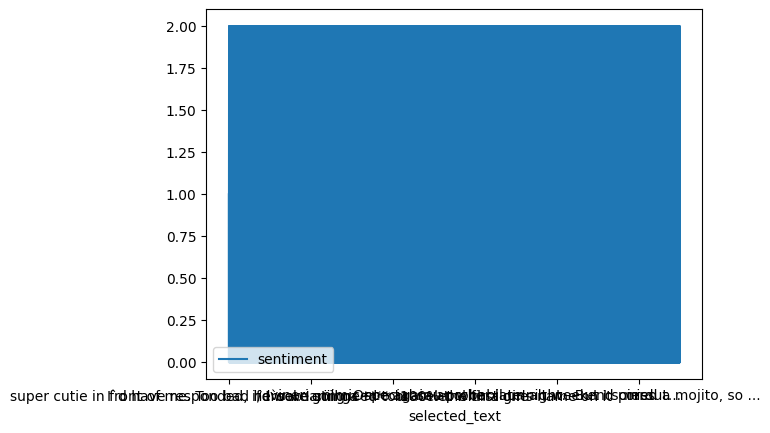

In [74]:
data.plot('selected_text','sentiment')

<Axes: xlabel='sentiment', ylabel='count'>

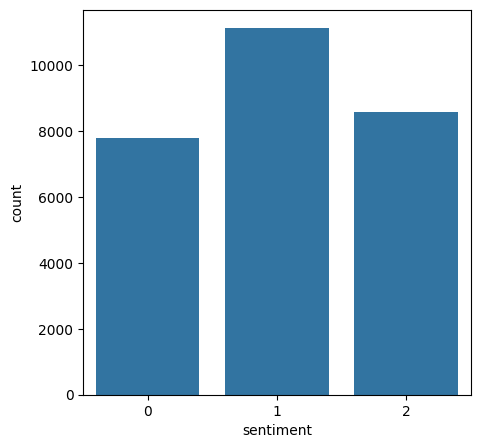

In [76]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = data)

In [77]:
X = data['stemmed_content'].values
y = data['sentiment'].values

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state= 2)

In [79]:
vectorizer = TfidfVectorizer()

X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [80]:
print(X_test)

  (0, 6893)	1.0
  (1, 11097)	0.37478033221916635
  (1, 10351)	0.48728921170463535
  (1, 6877)	0.37025398815590865
  (1, 4593)	0.3854621174301002
  (1, 3777)	0.3983617304164905
  (1, 2466)	0.2555076870777537
  (1, 1999)	0.33532614064917515
  (2, 2886)	0.7605793042062066
  (2, 2348)	0.6492450400374291
  (3, 952)	1.0
  (4, 10138)	0.6892700067312233
  (4, 3156)	0.7245045602484081
  (5, 11033)	0.31054261529028765
  (5, 10877)	0.40477417326475984
  (5, 8708)	0.33299467588806264
  (5, 7909)	0.4762672671293932
  (5, 5769)	0.3567771094616273
  (5, 1565)	0.5241328867777789
  (6, 10311)	0.5140373457005001
  (6, 9308)	0.45766488886458095
  (6, 8736)	0.33650291470556004
  (6, 5735)	0.3595646766367106
  (6, 3569)	0.348400327069597
  (6, 1488)	0.4029946656388312
  :	:
  (5489, 4690)	0.30577542596219304
  (5489, 3822)	0.42612731728636716
  (5489, 1999)	0.31686675214919174
  (5489, 1528)	0.38134200541640445
  (5490, 9102)	0.3455959201911675
  (5490, 8187)	0.3139131781035313
  (5490, 7580)	0.30368601593

In [108]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [109]:

model=DecisionTreeClassifier(criterion='entropy',random_state=742)
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=742)

In [111]:
X_train_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, X_train_pred)
accuracy

0.9783933770014556

In [112]:
print("Accuracy : ",accuracy*100)

Accuracy :  97.83933770014556


In [113]:
X_test_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, X_test_pred)

In [114]:
from transformers import pipeline

In [118]:
print(X_train)

  (0, 3486)	0.3265617824508339
  (0, 4835)	0.3880256958866541
  (0, 5194)	0.680709790352607
  (0, 7712)	0.5286091589183086
  (1, 10975)	1.0
  (2, 6662)	0.47097680596293395
  (2, 2166)	0.7249625885657467
  (2, 11379)	0.5026033161699242
  (3, 5527)	0.35999126189202013
  (3, 1993)	0.19546967990800512
  (3, 1038)	0.3279817844449449
  (3, 4789)	0.1863770134934004
  (3, 5297)	0.23480548334871834
  (3, 7662)	0.2405972296336927
  (3, 3547)	0.21754756109921236
  (3, 4148)	0.23384833425199703
  (3, 10384)	0.3458268424756872
  (3, 6165)	0.3279817844449449
  (3, 5940)	0.18391834786655717
  (3, 3964)	0.15016678226621707
  (3, 1159)	0.3458268424756872
  (3, 11536)	0.2677990753563386
  (4, 6530)	0.8009745909493986
  (4, 10975)	0.5986983419498034
  (5, 4205)	1.0
  :	:
  (21978, 3229)	0.4519396324258687
  (21978, 11397)	0.3523099097874253
  (21978, 11074)	0.3486222795561829
  (21978, 3156)	0.31744374227097233
  (21978, 9668)	0.36333742255116
  (21978, 6893)	0.2814182601216452
  (21979, 7619)	0.45575591